# Bike Sharing System 2011

> #### Hipótesis
**La hipótesis principal de este proyecto es que la estación del año tiene un 
impacto en la cantidad de viajes en bicicleta. Específicamente, 
se espera que el uso de bicicletas varíe de manera estacional, con picos durante las 
estaciones más cálidas y una disminución en las estaciones más frías.**
 

Utilización Estacional:
- ¿Cómo varía la frecuencia de uso de las bicicletas a lo largo de las estaciones del año?
- ¿Hay alguna estación en la que se observa un aumento o disminución significativa en el uso de bicicletas?

Diferencias entre Estaciones:
- ¿Existen patrones de uso de bicicletas distintos entre estaciones para clientes casuales y registrados?

Preferencias Estacionales:
- ¿Hay estaciones específicas del año en las que los clientes casuales tienden a usar más bicicletas que los registrados, o viceversa?

Patrones Diarios:
- ¿Cómo se distribuye el uso de bicicletas a lo largo del día en diferentes estaciones del año?
- ¿Existen horas pico o valle que difieran entre estaciones?

Impacto del Clima:
- ¿El clima en cada estación del año afecta la utilización de bicicletas de manera significativa?
- ¿Puedes identificar alguna tendencia en la relación entre las condiciones climáticas y la elección de bicicletas por parte de los clientes?


*****

1. **instant**: índice del registro.
   - Este campo simplemente contiene un número de índice que identifica cada registro en el conjunto de datos.

2. **dteday**: fecha.
   - Este campo almacena la fecha en la que se registró la información.

3. **season**: estación (1: invierno, 2: primavera, 3: verano, 4: otoño).
   -  Indica la estación del año en la que se registraron los datos, con valores numéricos que corresponden a las estaciones.

4. **yr**: año (0: 2011, 1: 2012).
   - Representa el año en el que se registraron los datos, donde "0" se refiere a 2011 y "1" a 2012.

5. **mnth**: mes (1 a 12).
   - Indica el mes en el que se registraron los datos, con valores numéricos del 1 al 12 correspondientes a los meses.

6. **hr**: hora (0 a 23).
   - Muestra la hora del día en la que se registraron los datos, en formato de 24 horas (0 a 23).

7. **holiday**: día festivo (si el día es festivo o no).
   - Indica si el día en cuestión es un día festivo ("1" si lo es y "0" si no lo es). La información se extrae de un calendario de festivos.

8. **weekday**: día de la semana (1 a 7).
   - Representa el día de la semana en el que se registraron los datos.

9. **workingday**: si el día es laborable (1 si el día no es fin de semana ni festivo, de lo contrario 0).
   - Indica si el día es laborable (día hábil) con un valor de "1" si no es un fin de semana ni un día festivo, y "0" en caso contrario.

10. **weathersit**: situación meteorológica.
    - Describe la situación meteorológica en el momento de la observación, con valores numéricos que representan diferentes condiciones climáticas.

    1. Despejado, Pocas nubes:

      - Indica condiciones meteorológicas en las que el cielo está despejado o parcialmente nublado, con pocas nubes visibles.

    2. Niebla + Pocas nubes, Niebla:

      - Hace referencia a condiciones de niebla o bruma en combinación con nubes o cielo nublado.

    3. Lluvia ligera, Tormenta + Nubes dispersas:

      - Representa condiciones de lluvia ligera junto con la presencia de tormentas o nubes dispersas en el cielo.

    4. Lluvia intensa + Granizo + Tormenta:

      - Indica condiciones meteorológicas adversas, como lluvia intensa, granizo, tormenta, niebla o nevada con visibilidad reducida debido a la niebla.

11. **temp**: temperatura normalizada en Celsius.
    - La temperatura se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

12. **atemp**: sensación térmica normalizada en Celsius.
    - Al igual que la temperatura, la sensación térmica se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

13. **hum**: humedad normalizada.
    - La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

14. **windspeed**: velocidad del viento normalizada.
    - La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

15. **casual**: conteo de usuarios casuales.
    - Muestra la cantidad de usuarios que alquilaron bicicletas de forma casual.

16. **registered**: conteo de usuarios registrados.
    - Indica la cantidad de usuarios que están registrados en el sistema y alquilaron bicicletas.

17. **cnt**: conteo total de bicicletas alquiladas, incluyendo usuarios casuales y registrados.
    - Representa el total de bicicletas alquiladas en un período determinado, incluyendo tanto a usuarios casuales como a usuarios registrados.


*****


Importamos librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos Datos Crudos

In [ ]:
df = pd.read_csv('./bike+sharing+dataset/hour.csv')
df.head()

In [ ]:
df.shape

Como solo voy a trabajar con un año para mi hipótesis. Elegí el 2011.

In [ ]:
df2011 = df.query('yr == 0')
df2011.head()

In [ ]:
df2011.shape

In [ ]:
df2011.to_csv('Dataset_2011.csv') 

In [ ]:
df2012 = df.query('yr == 1')
df2012.to_csv('Dataset_2012.csv')

In [ ]:
df2011 = pd.read_csv('Dataset_2011.csv', sep=',', index_col='instant')
df2011.head()

In [ ]:
print(df2011.shape)

In [ ]:
df2011.drop(columns=['Unnamed: 0','yr'],inplace=True) 
df2011.head()

- La instancia la tomaré como índice que comienza desde el 1. El unhamed, era lo mismo pero desde 0, prefiero trabajar con uno solo de ellos.
- Eliminamos la variable 'yr' ya que representaba el 2011 en valores = 0.

In [ ]:
#Por cada día deberíamos de tener 0 - 23 registros. Ya que la base de datos es en base a la hora.Eso no ocurre
df2011.query("dteday == '2011-01-01'")

In [ ]:
df2011.shape #Tengo datos faltantes = 365 * 24 = 8760

- Cargamos el DataFrame de 2011, luego de guardarlo en un archivo .CSV. 
- Ahora analizaremos los tipos de datos, si se encuentran valores nulos como duplicados y trataremos con ellos para después de la limpieza comenzar a responder nuestra hipótesis.

In [ ]:
df2011.info()

In [ ]:
df2011.columns

In [ ]:
df2011.describe()

- Season: Podemos ver que la temporada de verano abarca la media y el 75%.
- temp, atemp, hum: Los valores normalizados no son tan visibles al momento de tratar o mismo gráficar aquellos datos.
- casual, registered, cnt : Los valores máximos se encuentran bastante alejados.

In [ ]:
df2011.isnull().sum()

In [ ]:
df2011.duplicated(keep=False).sum()

In [ ]:
df2011['dteday'].nunique()

In [ ]:
df_hour = df2011.groupby(['dteday','mnth'])[['hr']].count()

In [ ]:
df_hour.query('hr <= 23').sort_values(by='mnth') #Algunas fechas estaría bueno comparar con la temperatura.

**Podemos observar que faltan datos, ya que en esas horas no hubo ningún registro. Por ende, no figura en el DataFrame**


*****

- **temp**: Temperatura normalizada en Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

- **atemp**: Sensación térmica normalizada en Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

- **hum**: La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

- **windspeed**: La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

*Aplicamos la fórmula ajustada:*

Temperatura Discreta = valor_ajustado_temp = **0.24** **×** multiplicamos por su ajuste = **41**

*Calculamos el resultado:*

Temperatura Discreta = round(9.84)

Temperatura Discreta =10

In [ ]:
df2011 = df2011.assign(
    temperatura = (lambda x : round(x.temp * 41)),
    sensacionTermica = (lambda x : round(x.atemp * 50)),
    humedad = (lambda x : round(x.hum * 100)),
    velViento = (lambda x: round(x.windspeed * 67))
)

#Se pueden ordenar las columnas?

In [ ]:
df2011.drop(columns= ['temp','atemp','hum', 'windspeed'], inplace=True)
df2011.describe(include='all')

In [35]:
df2011.shape

(8645, 15)

In [66]:
df2011

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temperatura,sensacionTermica,humedad,velViento
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,1,0,0,6,0,1,3,13,16,10.0,14.0,81.0,0.0
2,2011-01-01,1,1,1,0,6,0,1,8,32,40,9.0,14.0,80.0,0.0
3,2011-01-01,1,1,2,0,6,0,1,5,27,32,9.0,14.0,80.0,0.0
4,2011-01-01,1,1,3,0,6,0,1,3,10,13,10.0,14.0,75.0,0.0
5,2011-01-01,1,1,4,0,6,0,1,0,1,1,10.0,14.0,75.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,2011-12-31,1,12,19,0,6,0,1,19,73,92,17.0,21.0,54.0,15.0
8642,2011-12-31,1,12,20,0,6,0,1,8,63,71,17.0,21.0,54.0,15.0
8643,2011-12-31,1,12,21,0,6,0,1,2,50,52,16.0,20.0,58.0,13.0


In [36]:
df2011.query('dteday == "2011-01-27"') #Como podemos observar en este día solo hubieron 8 registros. 

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temperatura,sensacionTermica,humedad,velViento
instant,,,,,,,,,,,,,,,
588,2011-01-27,1,1,16,0,4,1,1,1,23,24,9.0,11.0,55.0,13.0
589,2011-01-27,1,1,17,0,4,1,1,2,82,84,9.0,12.0,55.0,7.0
590,2011-01-27,1,1,18,0,4,1,1,3,101,104,8.0,11.0,69.0,6.0
591,2011-01-27,1,1,19,0,4,1,1,3,76,79,8.0,11.0,69.0,6.0
592,2011-01-27,1,1,20,0,4,1,1,4,55,59,7.0,11.0,74.0,6.0
593,2011-01-27,1,1,21,0,4,1,1,2,36,38,7.0,11.0,74.0,6.0
594,2011-01-27,1,1,22,0,4,1,1,0,27,27,7.0,11.0,74.0,6.0
595,2011-01-27,1,1,23,0,4,1,1,0,16,16,7.0,10.0,80.0,11.0


In [67]:
df2011

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temperatura,sensacionTermica,humedad,velViento
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,1,0,0,6,0,1,3,13,16,10.0,14.0,81.0,0.0
2,2011-01-01,1,1,1,0,6,0,1,8,32,40,9.0,14.0,80.0,0.0
3,2011-01-01,1,1,2,0,6,0,1,5,27,32,9.0,14.0,80.0,0.0
4,2011-01-01,1,1,3,0,6,0,1,3,10,13,10.0,14.0,75.0,0.0
5,2011-01-01,1,1,4,0,6,0,1,0,1,1,10.0,14.0,75.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,2011-12-31,1,12,19,0,6,0,1,19,73,92,17.0,21.0,54.0,15.0
8642,2011-12-31,1,12,20,0,6,0,1,8,63,71,17.0,21.0,54.0,15.0
8643,2011-12-31,1,12,21,0,6,0,1,2,50,52,16.0,20.0,58.0,13.0


In [58]:
df2011.query('mnth == 12 and season == 4').tail(10)

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temperatura,sensacionTermica,humedad,velViento
instant,,,,,,,,,,,,,,,
8375,2011-12-20,4,12,14,0,2,1,2,11,127,138,18.0,22.0,58.0,7.0
8376,2011-12-20,4,12,15,0,2,1,2,15,139,154,18.0,22.0,54.0,0.0
8377,2011-12-20,4,12,16,0,2,1,1,20,218,238,18.0,22.0,54.0,0.0
8378,2011-12-20,4,12,17,0,2,1,1,14,417,431,16.0,20.0,62.0,11.0
8379,2011-12-20,4,12,18,0,2,1,1,26,385,411,16.0,20.0,66.0,13.0
8380,2011-12-20,4,12,19,0,2,1,1,6,218,224,16.0,20.0,66.0,0.0
8381,2011-12-20,4,12,20,0,2,1,1,3,144,147,15.0,19.0,66.0,0.0
8382,2011-12-20,4,12,21,0,2,1,1,4,139,143,15.0,18.0,66.0,6.0
8383,2011-12-20,4,12,22,0,2,1,2,3,104,107,15.0,19.0,66.0,0.0


In [69]:
df2011.query('mnth == 12 and season == 1').head(10)

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temperatura,sensacionTermica,humedad,velViento
instant,,,,,,,,,,,,,,,
8385,2011-12-21,1,12,0,0,3,1,2,7,18,25,14.0,17.0,71.0,9.0
8386,2011-12-21,1,12,1,0,3,1,2,1,10,11,15.0,18.0,66.0,7.0
8387,2011-12-21,1,12,2,0,3,1,2,0,4,4,15.0,19.0,71.0,0.0
8388,2011-12-21,1,12,3,0,3,1,2,0,2,2,15.0,19.0,71.0,0.0
8389,2011-12-21,1,12,4,0,3,1,2,0,2,2,15.0,19.0,71.0,0.0
8390,2011-12-21,1,12,5,0,3,1,2,0,28,28,16.0,20.0,82.0,7.0
8391,2011-12-21,1,12,6,0,3,1,2,1,75,76,15.0,19.0,87.0,0.0
8392,2011-12-21,1,12,7,0,3,1,2,5,224,229,15.0,18.0,87.0,7.0
8393,2011-12-21,1,12,8,0,3,1,3,12,393,405,15.0,19.0,93.0,0.0


In [63]:
df2011.groupby(['season','mnth'])[['cnt']].sum()

cnt
season mnth        
1      1      38189
       2      48215
       3      41206
       12     22390
2      3      22839
       4      94870
       5     135821
       6      93786
3      6      49726
       7     141341
       8     136691
       9      91892
4      9      35526
       10    123511
       11    102167
       12     64933

<Axes: xlabel='mnth', ylabel='cnt'>

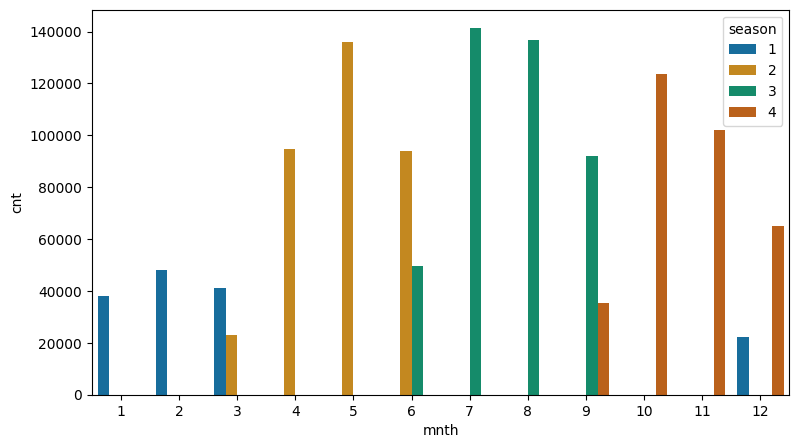

In [65]:
plt.figure(figsize=(9,5))
sns.barplot(data=df2011.groupby(['season','mnth'])[['cnt']].sum(), x='mnth',y='cnt',hue='season', palette='colorblind')

Prueba métrica porque en el anterior gráfico no tnemos clima. tenemos la temporada nada más. 
Se me ocurrió hacer un rango con la temperatura y sensacion termica por temporada

In [75]:
df_temp_rango = df2011.groupby(['season','mnth']).aggregate({'temperatura': ['min', 'mean', 'max'],'sensacionTermica': ['min', 'mean', 'max'],'cnt':'sum'})

In [ ]:
df_inv_prim = df2011.query('season <= 2').groupby(['season'])[['temperatura','cnt']].agg({'temperatura':'mean', 'cnt': 'sum'})
sns.barplot(data=df_inv_prim,x='cnt',y='temperatura', hue='season',palette='colorblind')

In [ ]:
df_ver_oton = df2011.query('season >= 3').groupby(['season'])[['temperatura','cnt']].agg({'temperatura':'mean', 'cnt': 'sum'})
sns.barplot(data=df_ver_oton,x='cnt',y='temperatura', hue='season',palette='colorblind')

In [ ]:
df2011.groupby(['season','temperatura'])['casual','registered'].agg({'casual':'sum','registered' : 'sum'})

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

bar_width = 0.30
x = df_estaciones

golden = ax.bar(x-bar_width, df_best['Gold'], bar_width, label='Oro', color='gold')
silver = ax.bar(x, df_best['Silver'], bar_width, label='Plata', color='silver')

ax.set_xticks(x);
ax.set_xticklabels(df_best.index, rotation=90);
ax.legend();

# Etiquetas en las barras
ax.bar_label(golden);
ax.bar_label(silver);
ax.bar_label(bronze);

ax.spines['right'].set_visible(False) # oculta el borde derecho
ax.spines['top'].set_visible(False) # oculta el borde superior

fig.tight_layout()

******

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Supongamos que df2011 es tu DataFrame

# # Agrupa por temporada y suma las columnas 'casual' y 'registered'
# grouped_data = df2011.groupby('season')[['casual','registered']].agg({'casual':'sum','registered':'sum'}).reset_index()

# # Crea el gráfico de barras
# fig, ax = plt.subplots(2)
# ax[0].bar(x='season', y='casual', data=grouped_data, color='blue', label='Casual')
# ax[1].bar(x='season', y='registered', data=grouped_data, color='orange', label='Registered')

# # Agrega etiquetas y leyenda
# plt.xlabel('Season')
# plt.ylabel('Count')
# plt.title('Casual vs Registered by Season')
# plt.legend()


In [ ]:
sns.boxplot(data=df2011,x='mnth',y='Temperatura') #Esto es la temperatura en los meses.

In [ ]:
x = df2011.groupby(['mnth','season'])[['cnt']].sum()
sns.boxplot(data=x, x='season',y='cnt')

In [ ]:
sns.lineplot(data=x, x='mnth',y='cnt')

*****

In [ ]:
#La documentación es erronea. el 1 en season representa el invierno.

df2011_season1_inv = df2011.query('season == 1') 
df2011_season1_inv['mnth'].unique()

In [ ]:
df2011_season1_inv['Temperatura'].describe()

In [ ]:
sns.boxplot(data=df2011_season1_inv,x='mnth',y='Temperatura')

In [ ]:

df2011_season2_prim= df2011.query('season == 2') 
df2011_season2_prim['mnth'].unique()

In [ ]:
df_test = df2011_season2_prim.groupby(['mnth'])[['cnt']].sum()#Porqué sum y no count. El count es para ver cuantos registros y el sum, es la suma de ellos. 

In [ ]:
sns.barplot(data=df_test, y='cnt', x='mnth', palette='viridis')
plt.show()